# Wilcoxon & U de Mann-Withney

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Wilcoxon
## 1.1 Cargar librería y base de datos

In [2]:
w_data=pd.read_excel('Wilcoxon_Data.xlsx')

In [3]:
w_data.head()

,valor,clase
0,6.2,Antes
1,5.8,Antes
2,6.4,Antes
3,5.3,Antes
4,5.0,Antes


## 1.2 Supuestos del test de Wilcoxon
El único supuesto que deben seguir los datos es que sean ordinales.
No requiere supuesto de normalidad ni de homocedasticidad.

#### Hipóteisis
$$\begin{cases} { H }_{ 0 }: {Med}_{dif}=0 \\ { H }_{ 1 }: {Med}_{dif}\ne 0 \end{cases}$$

## 1.3 Test de Wilcoxon

In [26]:
W_statistic, Pvalue = stats.wilcoxon(w_data['valor'][w_data['clase']=='Antes'],
                                        w_data['valor'][w_data['clase']=='Después'], 
                                        zero_method='wilcox', correction=False)

print('Estadístico de contraste : ' + str(W_statistic))
print('P-valor: ' + str(Pvalue))

Estadístico de contraste : 1764.0
P-valor: 0.00012161475217272842


Pvalor <= 0.05, por lo que existen evidencias para decir que ambos grupos son distintos.

# 2. U de Mann-Withney
## 2.1 Cargar base de datos
###  Lista con los nombres de las variables del dataframe

In [8]:
from sklearn.datasets import load_wine

wine_names = load_wine()
names = wine_names['feature_names']
names.append('class')

### Construcción del dataframe

In [12]:
data, target = load_wine(return_X_y=True)
data = pd.DataFrame(data)
target = pd.DataFrame(target)
wine = pd.concat([data, target], axis=1)
wine.columns = names
wine['class'].replace({0: 'class_0', 1: 'class_2', 2: 'class_1'}, inplace = True)
wine=pd.concat([wine[wine['class']=='class_0'], wine[wine['class']=='class_1']], axis=0)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


## 2.2 Test de normalidad
### Hipótesis:
$$\begin{cases} { H }_{ 0 }: la \quad variable \quad procede \quad de \quad una \quad distribución \quad normal \\ { H }_{ 1 }: la \quad variable \quad no \quad procede \quad de \quad una \quad distribución \quad normal\end{cases}$$

In [13]:
p_values = pd.DataFrame(stats.normaltest(wine.iloc[:, :-1]).pvalue ,index = names[:-1]).T
p_values.style.applymap(lambda x: 'background-color : lightgreen' if x>=0.05 else 'background-color : salmon')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.450497,0.00227458,0.0450865,0.954489,0.102813,7.46603e-05,0.923424,0.00352042,0.210936,0.00091475,5.65278e-11,5.09902e-32,0.00924683


En verde los valores estadísticamente no significativos ( p−valor≥0.05 ) y en rojo los valores estadísticamente significativos ( p−valor<0.05 ). Anteriormente se utilizaron los datos que proceden de una distribución normal para realizar un tes de Kruscal Wallis; en este caso tomaremos los datos que sigan una distribución distinta a la normal para realizar el análisis no paramétrico de Mann-Withney.

## 2.3 Revisión de los supuestos estadísticos
Es una técnica no paramétrica en la que se intenta comparar las medianas de dos grupos. Aunque es una técnica no paramétrica, los datos deben cumplir ciertos supuestos para que el resultado que proporcione el test sea válido:

Independencia. Las muestras deben ser independientes.
Datos ordinales. Deben poder ordenarse los datos de menor a mayor.
Homocedasticidad. Las desviaciones estándar de los grupos deben ser iguales.
### 2.3.1 Independencia
Se conoce de antemano que las muestras recogidas por los grupos son independientes
### 2.3.2 Homocedasticidad
Para demostrar la homocedasticidad se realiza el test de Levene el cual contrasta las siguientes hipótesis
$$\begin{cases} { H }_{ 0 }: Varianzas \quad iguales \\ { H }_{ 1 }: Varianzas \quad distintas \end{cases}$$

In [14]:
stats.levene(wine['total_phenols'][wine['class'] == 'class_0'], 
             wine['total_phenols'][wine['class'] == 'class_1']).pvalue

0.9630155799607799

Por tanto no hay ninguna evidencia para rechazar la hipótesis nula.

## 2.4 Test de U Mann-Withney
#### Hipóteisis
$$\begin{cases} { H }_{ 0 }: {Med}_{dif}=0 \\ { H }_{ 1 }: {Med}_{dif}\ne 0 \end{cases}$$

In [23]:
U_statistic, Pvalue = stats.mannwhitneyu(wine['total_phenols'][wine['class'] == 'class_0'],
                                       wine['total_phenols'][wine['class'] == 'class_1'])

print('Estadístico de contraste : ' + str(U_statistic))
print('P-valor: ' + str(Pvalue))

Estadístico de contraste : 44.0
P-valor: 4.2168923521426366e-18


El P-valor es menor que 0.05, por lo que existen evidencias para rechazar la hipótesis nula. Es decir, se puede afirmar que ambos grupos poseen medianas distintas.

### BOX-PLOT

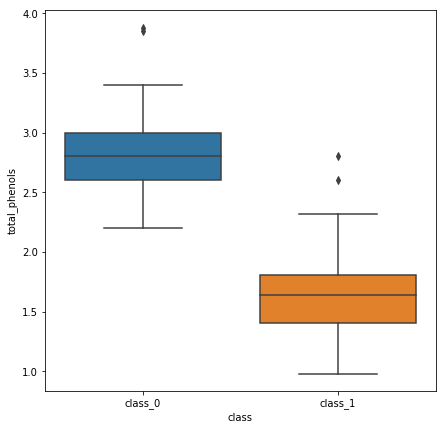

In [18]:
plt.figure(figsize=(7,7))
sns.boxplot(x="class", y="total_phenols", data=wine)